In [76]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [77]:
# Создаем вершины
bayesNet = BayesianNetwork()
bayesNet.add_node("Burglary")
bayesNet.add_node("Earthqk")
bayesNet.add_node("Alarm")
bayesNet.add_node("John calls")
bayesNet.add_node("Mary calls")


# Создаем грани
bayesNet.add_edge("Burglary", "Alarm")
bayesNet.add_edge("Earthqk", "Alarm")
bayesNet.add_edge("Alarm", "John calls")
bayesNet.add_edge("Alarm", "Mary calls")


In [79]:
#Добавление вероятностей
cpd_B = TabularCPD('Burglary', 2, values=[[.999], [.001]])
cpd_E = TabularCPD('Earthqk', 2, values=[[.998], [.002]])

cpd_A = TabularCPD('Alarm', 2, values=[[0.999, .71, .06, .05], [.001, .29, .94, .95]],
                   evidence=['Burglary', 'Earthqk'], evidence_card=[2, 2])


cpd_J = TabularCPD('John calls', 2, values=[[0.95, .1], [.05, .9]],
                   evidence=['Alarm'], evidence_card=[2])

cpd_M = TabularCPD('Mary calls', 2, values=[[0.99, .3], [.01, .7]],
                   evidence=['Alarm'], evidence_card=[2])



bayesNet.add_cpds(cpd_B, cpd_E,cpd_A, cpd_J, cpd_M)


In [80]:
bayesNet.check_model()
print("Model is correct.")


Model is correct.


In [81]:
solver = VariableElimination(bayesNet)


In [83]:
# Вероятность работы сигнализации
result = solver.query(variables=['Alarm'])
print(result)
print(f'Вероятность того, что сигнализация сработает = {result.values[1]}')

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.9975 |
+----------+--------------+
| Alarm(1) |       0.0025 |
+----------+--------------+
Вероятность того, что сигнализация сработает = 0.0025164420000000002


In [84]:
# Вероятность работы сигнализации при землетрясении
result = solver.query(variables=['Alarm'], evidence={'Earthqk': 1})
print(result)
print(f'Вероятность того, что сигнализация сработает при землетрясении = {result.values[1]}')

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.7093 |
+----------+--------------+
| Alarm(1) |       0.2907 |
+----------+--------------+
Вероятность того, что сигнализация сработает при землетрясении = 0.29066


In [85]:
# Вероятность работы сигнализации при взломе
result = solver.query(variables=['Alarm'], evidence={'Burglary': 1})
print(result)
print(f'Вероятность того, что сигнализация сработает при взломе = {result.values[1]}')

+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.0600 |
+----------+--------------+
| Alarm(1) |       0.9400 |
+----------+--------------+
Вероятность того, что сигнализация сработает при взломе = 0.94002


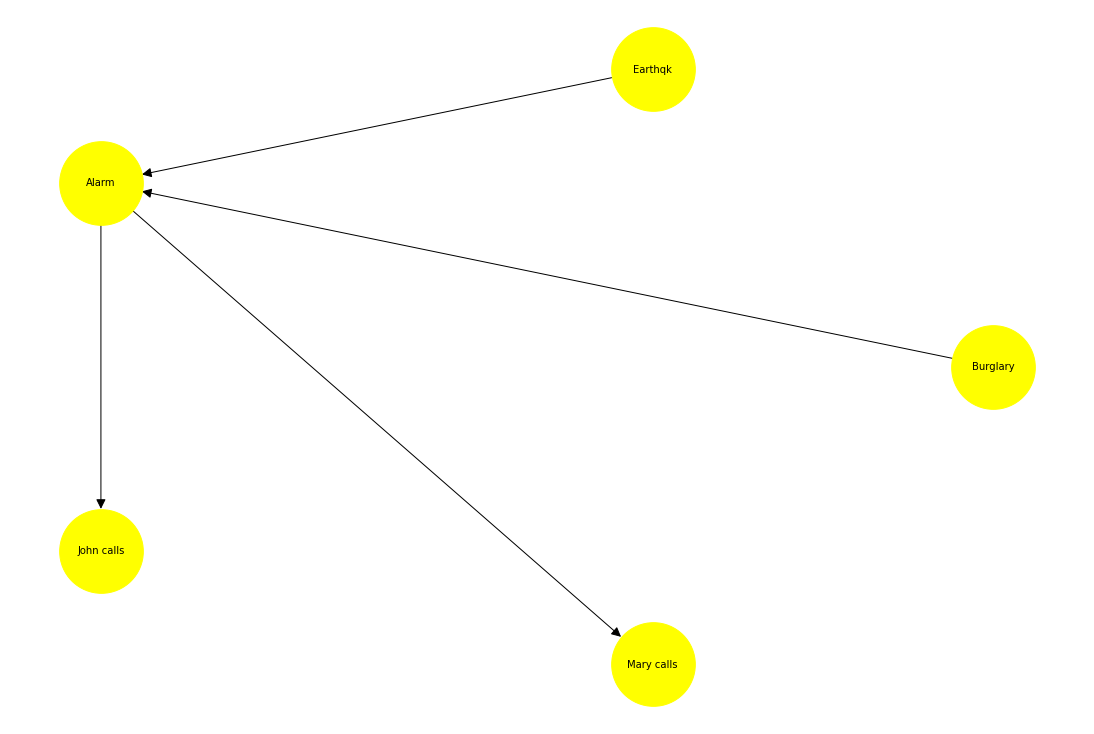

In [86]:
plt.figure(figsize=(15,10))
nx.draw_circular(solver.model, with_labels=True, arrowsize=20, node_size=7000, font_size=10,node_color='yellow')
plt.show()